# Tutorial 1: Clean and visualize astronomy data
 

---

## Introduction

In this tutorial you will learn how to do the following:
-  Data Visualization 
-  Clean the data
#### Let's get started!

---

First we import some libraries:

In [ ]:
# ___Cell no. 1___
import pandas as pd # for importing data into data frame format
import seaborn as sns # For drawing useful graphs, such as bar graphs
import matplotlib.pyplot as plt
import numpy as np
import astropy.io.fits as fits  #package provides access to FITS file format (https://docs.astropy.org/en/stable/io/fits/index.html)
from astropy.table import Table 

<b><i> Reading in data </i></b>

in order to have a dataframe data format, we need to convert the *'fits file'* and convert it into a *'table'* then into a *'dataframe'* (pandas).

**pandas** is a very popular tool that is used extensilvy among the data science community. its mostly used to manuiplaute (clean and analysis) data in a very easy way.

In [2]:


filename = '/idia/projects/hippo/astroml/data/sdss_all_large_dr16_red_catwise.fits.gz'
fitsFile = fits.open(filename, memmap=True)

table_data = Table(fitsFile[1].data) 
df = table_data.to_pandas()

---

<b><i> Examining data </i></b> 

First let's take a look at the raw data

In [3]:
print(df.head(5)) # shows the first 5 elements in the dataframe.

                 objID          ra        dec     raErr    decErr  type  \
0  1237679479084155171    8.104365  23.669649  0.021190  0.021140     6   
1  1237678617411322668  345.189621   1.194889  0.037775  0.037008     3   
2  1237678617411322688  345.202994   1.163524  0.035891  0.042338     3   
3  1237678617411387839  345.225493   1.184593  0.017604  0.015682     6   
4  1237679434519347440    1.967231  -2.747982  0.015730  0.014864     6   

   skyVersion   run  rerun  camcol  ...  k2  km   plx1  e_plx1   plx2  e_plx2  \
0           2  7917    301       6  ...   3   3  0.191   0.109  0.180   0.109   
1           2  7717    301       1  ...   3   3 -0.057   0.077 -0.038   0.076   
2           2  7717    301       1  ...   3   3 -0.052   0.067 -0.056   0.068   
3           2  7717    301       1  ...   3   3  1.723   0.412  1.680   0.413   
4           2  7907    301       3  ...   3   3  0.202   0.164  0.200   0.159   

     Sep   ccf  abfl   angDist  
0  0.555  0000    00  0.13850

In [4]:
print("Rows: "+str(df.shape[0]) + ", Cols: "+str(df.shape[1])) # shows the shape of the dataframe in rows and columns.

Rows: 3500958, Cols: 277


---

<b><i> Data summary </i></b> 


The data contains the following (Prof needs to explain those stuff)
- Wise features: 
- ModelMag features: 
- CModelMag features: 
- PSFMag features: 
- the class of the space object:

and many more, but the above is what we are interested in three upcoming tutorials.


---

<b><i> Data cleaning </i></b> 

we need to restrict our dataframe into few columns since there are many that we are not interested in. for this tutorial we will just import the following:
- Modelmag features (u, r, i, g, z)
- wize features (w1, w2)
- target

In [6]:
data_ModelM = df[['modelMag_u','modelMag_g','modelMag_r','modelMag_i','modelMag_z', 'W1mproPM', 'W2mproPM', 'specclass']]

notice that the variable names are long, let us change them

In [18]:
data_ModelM = data_ModelM.rename({'modelMag_u':'Mu', 'modelMag_g':'Mg', 'modelMag_r':'Mr',
                      'modelMag_i':'Mi', 'modelMag_z':'Mz', 'W1mproPM':'W1', 'W2mproPM':'W2', 'specclass': 'class'}, axis='columns')

In [19]:
print(data_ModelM.columns)

Index(['Mu', 'Mg', 'Mr', 'Mi', 'Mz', 'W1', 'W2', 'class'], dtype='object')


let us check for empty cells

In [10]:
data_ModelM.isnull().values.any() # this function checks for an empty cells for the entire dataframe


False

---

<b><i> Visualising data (data_ModelM)</i></b> 


**Exercise 1:** Show the first 5 rows, and the shape of *data_ModelM* dataframe.
<br>

In [13]:
#  ___ code here ____


now, let us vislualize the frequency between the classes in the specclass

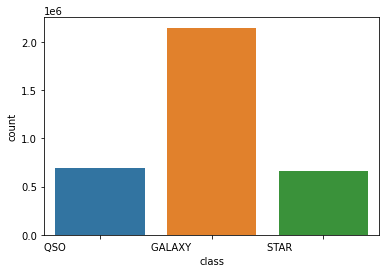

In [20]:
ax = sns.countplot(x="class",data=data_ModelM)


We can notice the following from the above class:
- the data is impalanced
- the class names had a tailed white space (we will need to remove it now)

In [28]:
data_ModelM['class'] = data_ModelM['class'].str.strip()

now let us rechck the class names, and show thier frequencies.

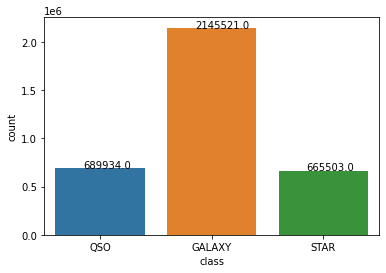

In [30]:
ax = sns.countplot(x="class",data=data_ModelM)
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.show()

that looks better!

now let us do some summary graphs that shows the scatter plt and the histogrames of the features ploted aginst the tagets 'class'plot. but there is a problem is that we have almost 3.5 million resources, then we need to pick 5000 randomly selected samples for each class.

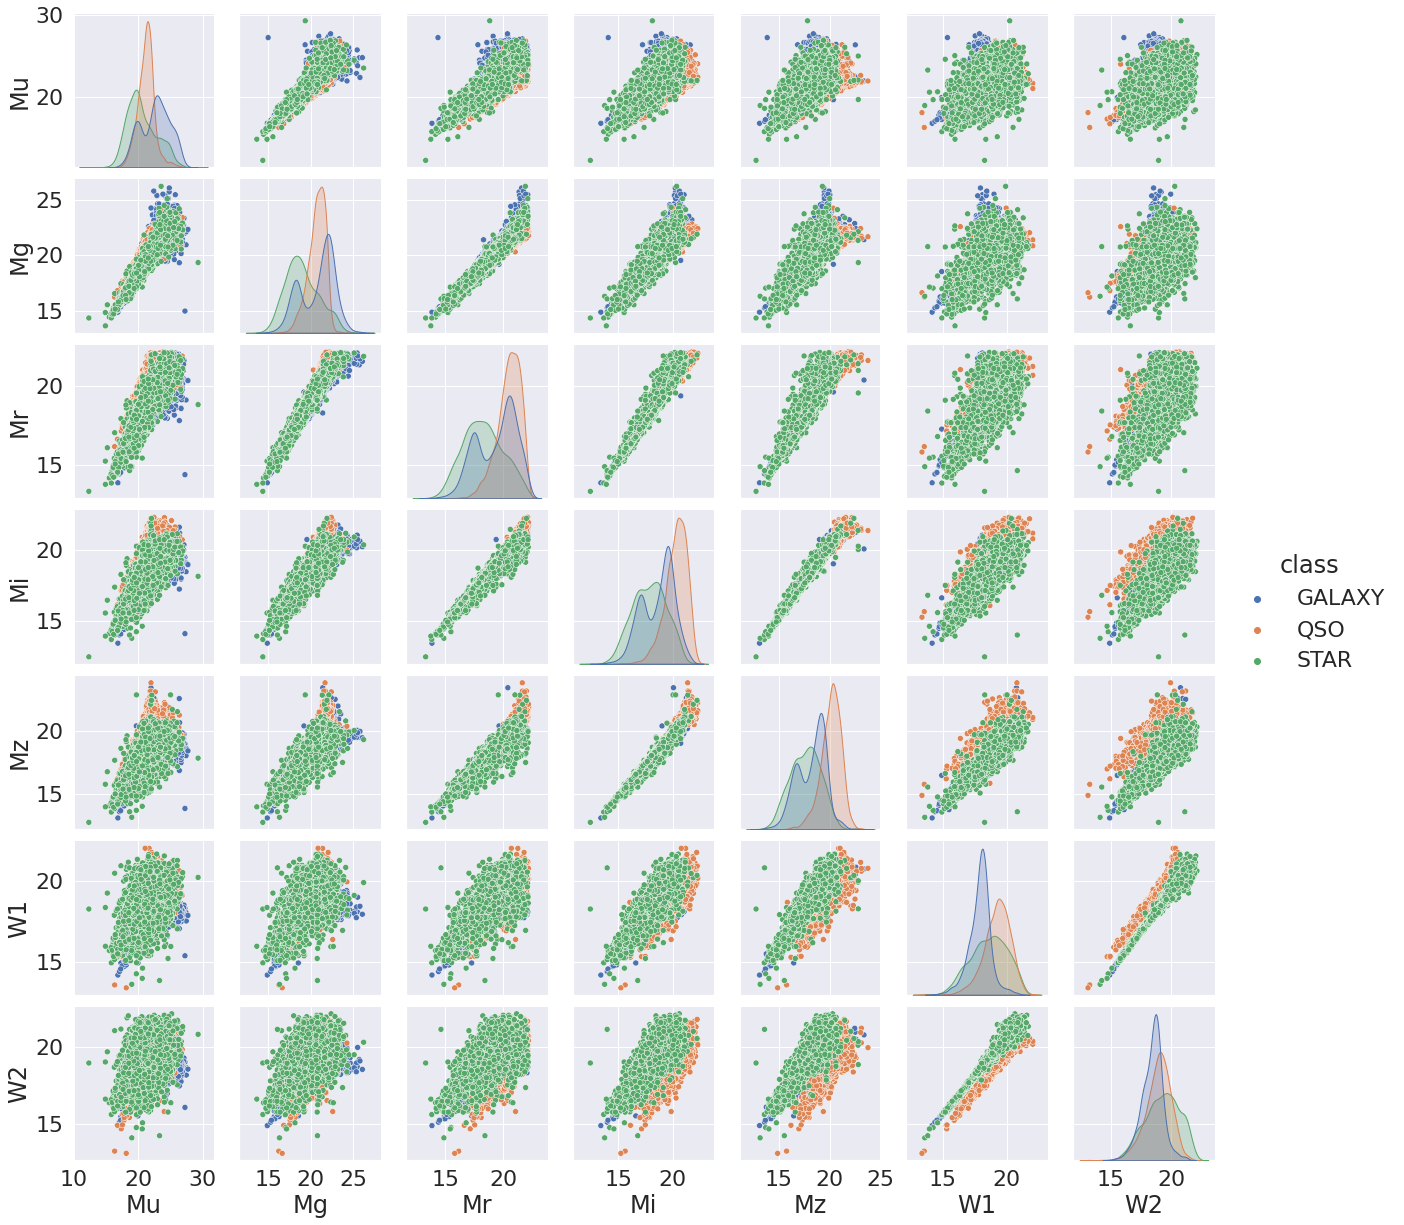

In [35]:
sample_ModelM = data_ModelM.groupby('class', group_keys=False).apply(lambda x: x.sample(2000)) # ranomly selects 2000 samples from each class (https://www.geeksforgeeks.org/python-pandas-dataframe-sample/)

sns.set(font_scale=2)
sns.pairplot(sample_ModelM, hue="class")

the scatter plot shows that there is no separations between the classes

---

some explentaion here why are we creating all of those features

now let us save the data to use it in the next tutorial

In [36]:
%store data_ModelM


Stored 'data_ModelM' (DataFrame)


---

Do the same for the other feature groups (cmodelmag, psfmodelmag).